# Final Capstone Project - Notebook

Import necessary libraries.

In [1]:
import pandas as pd
import numpy as np

Scrape the Toronto dataset from Wikipedia.

In [2]:
DataT = pd.read_html("https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M")
DataT1 = DataT[0]
DataT1

,Postal Code,Borough,Neighbourhood
0,M1A,Not assigned,Not assigned
1,M2A,Not assigned,Not assigned
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,"Regent Park, Harbourfront"
...,...,...,...
175,M5Z,Not assigned,Not assigned
176,M6Z,Not assigned,Not assigned
177,M7Z,Not assigned,Not assigned
178,M8Z,Etobicoke,"Mimico NW, The Queensway West, South of Bloor,..."


Drop any rows with 'Not assigned' in the Borough column.

In [3]:
indexNamesT = DataT1[DataT1['Borough'] == 'Not assigned'].index
DataT1.drop(indexNamesT , inplace=True)
DataT1.reset_index
DataT1

,Postal Code,Borough,Neighbourhood
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,"Regent Park, Harbourfront"
5,M6A,North York,"Lawrence Manor, Lawrence Heights"
6,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government"
...,...,...,...
160,M8X,Etobicoke,"The Kingsway, Montgomery Road, Old Mill North"
165,M4Y,Downtown Toronto,Church and Wellesley
168,M7Y,East Toronto,"Business reply mail Processing Centre, South C..."
169,M8Y,Etobicoke,"Old Mill South, King's Mill Park, Sunnylea, Hu..."


Combine neighbourhoods of the same postal code.

In [4]:
DataT2 = DataT1.groupby(['Postal Code','Borough'], as_index=False).agg(lambda x: ','.join(x))
DataT2

,Postal Code,Borough,Neighbourhood
0,M1B,Scarborough,"Malvern, Rouge"
1,M1C,Scarborough,"Rouge Hill, Port Union, Highland Creek"
2,M1E,Scarborough,"Guildwood, Morningside, West Hill"
3,M1G,Scarborough,Woburn
4,M1H,Scarborough,Cedarbrae
...,...,...,...
98,M9N,York,Weston
99,M9P,Etobicoke,Westmount
100,M9R,Etobicoke,"Kingsview Village, St. Phillips, Martin Grove ..."
101,M9V,Etobicoke,"South Steeles, Silverstone, Humbergate, Jamest..."


Replace all 'Not assigned' values in the Neighbourhood column with the corresponding Borough to ensure complete data.

In [5]:
NT1 = DataT2['Neighbourhood'] == 'Not assigned'
DataT2.loc[NT1, 'Neighbourhood'] = DataT2.loc[NT1, 'Borough']
DataT2

,Postal Code,Borough,Neighbourhood
0,M1B,Scarborough,"Malvern, Rouge"
1,M1C,Scarborough,"Rouge Hill, Port Union, Highland Creek"
2,M1E,Scarborough,"Guildwood, Morningside, West Hill"
3,M1G,Scarborough,Woburn
4,M1H,Scarborough,Cedarbrae
...,...,...,...
98,M9N,York,Weston
99,M9P,Etobicoke,Westmount
100,M9R,Etobicoke,"Kingsview Village, St. Phillips, Martin Grove ..."
101,M9V,Etobicoke,"South Steeles, Silverstone, Humbergate, Jamest..."


Rename the Postal Code column 'PostalCode' as it will need to be differentiated later.

In [6]:
DataT2.rename(columns = {'Postal Code':'PostalCode'}, inplace = True) 

Get corresponding Longitude and Latitude data from csv.

In [7]:
LonLat = pd.read_csv('http://cocl.us/Geospatial_data') 
LonLat.head()

,Postal Code,Latitude,Longitude
0,M1B,43.806686,-79.194353
1,M1C,43.784535,-79.160497
2,M1E,43.763573,-79.188711
3,M1G,43.770992,-79.216917
4,M1H,43.773136,-79.239476


Combine Longitude and Latitude data with Neighborhood data to produce a single dataset.

In [8]:
Frames=[DataT2,LonLat]
DataT3=pd.concat(Frames, axis=1, sort=False)
DataT3

,PostalCode,Borough,Neighbourhood,Postal Code,Latitude,Longitude
0,M1B,Scarborough,"Malvern, Rouge",M1B,43.806686,-79.194353
1,M1C,Scarborough,"Rouge Hill, Port Union, Highland Creek",M1C,43.784535,-79.160497
2,M1E,Scarborough,"Guildwood, Morningside, West Hill",M1E,43.763573,-79.188711
3,M1G,Scarborough,Woburn,M1G,43.770992,-79.216917
4,M1H,Scarborough,Cedarbrae,M1H,43.773136,-79.239476
...,...,...,...,...,...,...
98,M9N,York,Weston,M9N,43.706876,-79.518188
99,M9P,Etobicoke,Westmount,M9P,43.696319,-79.532242
100,M9R,Etobicoke,"Kingsview Village, St. Phillips, Martin Grove ...",M9R,43.688905,-79.554724
101,M9V,Etobicoke,"South Steeles, Silverstone, Humbergate, Jamest...",M9V,43.739416,-79.588437


Get rid of second Postal Code column by defining columns. Drop 'PostalCode' column. 

In [9]:
DataT4 = DataT3[['Postal Code','Borough', 'Neighbourhood','Latitude','Longitude']]
DataT4

,Postal Code,Borough,Neighbourhood,Latitude,Longitude
0,M1B,Scarborough,"Malvern, Rouge",43.806686,-79.194353
1,M1C,Scarborough,"Rouge Hill, Port Union, Highland Creek",43.784535,-79.160497
2,M1E,Scarborough,"Guildwood, Morningside, West Hill",43.763573,-79.188711
3,M1G,Scarborough,Woburn,43.770992,-79.216917
4,M1H,Scarborough,Cedarbrae,43.773136,-79.239476
...,...,...,...,...,...
98,M9N,York,Weston,43.706876,-79.518188
99,M9P,Etobicoke,Westmount,43.696319,-79.532242
100,M9R,Etobicoke,"Kingsview Village, St. Phillips, Martin Grove ...",43.688905,-79.554724
101,M9V,Etobicoke,"South Steeles, Silverstone, Humbergate, Jamest...",43.739416,-79.588437


Rename Neighbourhood column 'Neighborhood' to ensure consisting in spelling.

In [10]:
DataT5 = DataT4.rename(columns={'Neighbourhood':'Neighborhood'},inplace = False) 
DataT5

,Postal Code,Borough,Neighborhood,Latitude,Longitude
0,M1B,Scarborough,"Malvern, Rouge",43.806686,-79.194353
1,M1C,Scarborough,"Rouge Hill, Port Union, Highland Creek",43.784535,-79.160497
2,M1E,Scarborough,"Guildwood, Morningside, West Hill",43.763573,-79.188711
3,M1G,Scarborough,Woburn,43.770992,-79.216917
4,M1H,Scarborough,Cedarbrae,43.773136,-79.239476
...,...,...,...,...,...
98,M9N,York,Weston,43.706876,-79.518188
99,M9P,Etobicoke,Westmount,43.696319,-79.532242
100,M9R,Etobicoke,"Kingsview Village, St. Phillips, Martin Grove ...",43.688905,-79.554724
101,M9V,Etobicoke,"South Steeles, Silverstone, Humbergate, Jamest...",43.739416,-79.588437


Filter dataset so that only data corresponding to the borough of 'Downtown Toronto' is remaining.

In [11]:
DataT6 = DataT5['Borough'] == 'Downtown Toronto'
DataT7 = DataT5[DataT6]
print(DataT7.shape)
DataT7.head()

(19, 5)


,Postal Code,Borough,Neighborhood,Latitude,Longitude
50,M4W,Downtown Toronto,Rosedale,43.679563,-79.377529
51,M4X,Downtown Toronto,"St. James Town, Cabbagetown",43.667967,-79.367675
52,M4Y,Downtown Toronto,Church and Wellesley,43.665860,-79.383160
53,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.654260,-79.360636
54,M5B,Downtown Toronto,"Garden District, Ryerson",43.657162,-79.378937


Subsequently scrape the Calgary dataset from Wikipedia.

In [12]:
DataC = pd.read_html("https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_T")
DataC1 = DataC[1]
DataC1

,Postal Code,Borough,Neighborhood,Latitude,Longitude
0,T1A,Medicine Hat,Central Medicine Hat,50.036460,-110.679250
1,T2A,Calgary,"Penbrooke Meadows, Marlborough",51.049680,-113.964320
2,T3A,Calgary,"Dalhousie, Edgemont, Hamptons, Hidden Valley",51.126060,-114.143158
3,T4A,Airdrie,East Airdrie,51.272450,-113.986980
4,T5A,Edmonton,"West Clareview, East Londonderry",53.5899,-113.4413
...,...,...,...,...,...
175,T5Z,Edmonton,West Lake District,53.5966,-113.4882
176,T6Z,Not assigned,Not assigned,Not assigned,Not assigned
177,T7Z,Stony Plain,Not assigned,53.5202,-114.0135
178,T8Z,Not assigned,Not assigned,Not assigned,Not assigned


Drop any rows with 'Not assigned' in the Borough column.

In [13]:
indexNamesC = DataC1[DataC1['Borough'] == 'Not assigned'].index
DataC1.drop(indexNamesC , inplace=True)
DataC1.reset_index
DataC1

,Postal Code,Borough,Neighborhood,Latitude,Longitude
0,T1A,Medicine Hat,Central Medicine Hat,50.036460,-110.679250
1,T2A,Calgary,"Penbrooke Meadows, Marlborough",51.049680,-113.964320
2,T3A,Calgary,"Dalhousie, Edgemont, Hamptons, Hidden Valley",51.126060,-114.143158
3,T4A,Airdrie,East Airdrie,51.272450,-113.986980
4,T5A,Edmonton,"West Clareview, East Londonderry",53.5899,-113.4413
...,...,...,...,...,...
171,T1Z,Rocky View,Not assigned,Not assigned,Not assigned
172,T2Z,Calgary,"Douglas Glen, McKenzie Lake, Copperfield, East...",50.9023,-113.9873
173,T3Z,Redwood Meadows,Not assigned,50.9821,-114.5178
175,T5Z,Edmonton,West Lake District,53.5966,-113.4882


Combine neighborhoods of the same postal code.

In [14]:
DataC2 = DataC1.groupby(['Postal Code','Borough'], as_index=False).agg(lambda x: ','.join(x))
DataC2

,Postal Code,Borough,Neighborhood,Latitude,Longitude
0,T1A,Medicine Hat,Central Medicine Hat,50.036460,-110.679250
1,T1B,Medicine Hat,South Medicine Hat,50.0172,-110.651
2,T1C,Medicine Hat,North Medicine Hat,50.0556,-110.6822
3,T1G,Taber,Not assigned,49.7773,-112.158
4,T1H,Lethbridge,North Lethbridge,49.7118,-112.8196
...,...,...,...,...,...
139,T9N,Bonnyville,Not assigned,54.2678,-110.7324
140,T9S,Athabasca,Not assigned,54.7139,-113.2942
141,T9V,Lloydminster,Not assigned,53.2786,-110.0233
142,T9W,Wainwright,Not assigned,52.8403,-110.8704


Replace all 'Not assigned' values in the Neighborhood column with the corresponding Borough to ensure complete data.

In [15]:
NC1 = DataC2['Neighborhood'] == 'Not assigned'
DataC2.loc[NC1, 'Neighborhood'] = DataC2.loc[NC1, 'Borough']
DataC2

,Postal Code,Borough,Neighborhood,Latitude,Longitude
0,T1A,Medicine Hat,Central Medicine Hat,50.036460,-110.679250
1,T1B,Medicine Hat,South Medicine Hat,50.0172,-110.651
2,T1C,Medicine Hat,North Medicine Hat,50.0556,-110.6822
3,T1G,Taber,Taber,49.7773,-112.158
4,T1H,Lethbridge,North Lethbridge,49.7118,-112.8196
...,...,...,...,...,...
139,T9N,Bonnyville,Bonnyville,54.2678,-110.7324
140,T9S,Athabasca,Athabasca,54.7139,-113.2942
141,T9V,Lloydminster,Lloydminster,53.2786,-110.0233
142,T9W,Wainwright,Wainwright,52.8403,-110.8704


Filter through dataset so that only data for the borough of Calgary remains.

In [16]:
DataC3 = DataC2['Borough'] == 'Calgary'
DataC4 = DataC2[DataC3]
DataC4.reset_index

<bound method DataFrame.reset_index of    Postal Code  Borough                                       Neighborhood  \
15         T1Y  Calgary                   Rundle, Whitehorn, Monterey Park   
17         T2A  Calgary                     Penbrooke Meadows, Marlborough   
18         T2B  Calgary                     Forest Lawn, Dover, Erin Woods   
19         T2C  Calgary  Lynnwood Ridge, Ogden, Foothills Industrial, G...   
20         T2E  Calgary                    Bridgeland, Greenview, Zoo, YYC   
21         T2G  Calgary  Inglewood, Burnsland, Chinatown, East Victoria...   
22         T2H  Calgary                        Highfield, Burns Industrial   
23         T2J  Calgary    Queensland, Lake Bonavista, Willow Park, Acadia   
24         T2K  Calgary                           Thorncliffe, Tuxedo Park   
25         T2L  Calgary                  Brentwood, Collingwood, Nose Hill   
26         T2M  Calgary          Mount Pleasant, Capitol Hill, Banff Trail   
27         T2N  Calgary  

Import additional libraries.

In [17]:
import requests
import json
from pandas.io.json import json_normalize
import seaborn as sns

print('Libraries imported.')

Libraries imported.


Define Foursquare credentials.

In [18]:
CLIENT_ID = 'V0ZH433JIMUGSE3S3WO2ZFDMQL5QODRHBMCVPVEZJYOKOCQB'
CLIENT_SECRET = 'CAKX35VZ5EQF5RDKA12FG0THBLNAIVL20EMX5M4U1HYRXFSG'
VERSION = '20180605'
LIMIT = 50

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: V0ZH433JIMUGSE3S3WO2ZFDMQL5QODRHBMCVPVEZJYOKOCQB
CLIENT_SECRET:CAKX35VZ5EQF5RDKA12FG0THBLNAIVL20EMX5M4U1HYRXFSG


Generate a function which gets a list of all venues and their corresponding characteristics for each neighborhood in both datasets.

In [19]:
def getNearbyVenues(names, latitudes, longitudes, radius=1000):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

Run Toronto dataset through function and return a list of venues associated with all neighborhoods.

In [20]:
T_Venues = getNearbyVenues(names=DataT7['Neighborhood'],
                                   latitudes=DataT7['Latitude'],
                                   longitudes=DataT7['Longitude']
                                  )

Rosedale
St. James Town, Cabbagetown
Church and Wellesley
Regent Park, Harbourfront
Garden District, Ryerson
St. James Town
Berczy Park
Central Bay Street
Richmond, Adelaide, King
Harbourfront East, Union Station, Toronto Islands
Toronto Dominion Centre, Design Exchange
Commerce Court, Victoria Hotel
University of Toronto, Harbord
Kensington Market, Chinatown, Grange Park
CN Tower, King and Spadina, Railway Lands, Harbourfront West, Bathurst Quay, South Niagara, Island airport
Stn A PO Boxes
First Canadian Place, Underground city
Christie
Queen's Park, Ontario Provincial Government


Find the shape of the returned datset T_Venues>

In [21]:
print(T_Venues.shape)
T_Venues.head()

(869, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Rosedale,43.679563,-79.377529,Summerhill Market,43.686265,-79.375458,Grocery Store
1,Rosedale,43.679563,-79.377529,Toronto Lawn Tennis Club,43.680667,-79.388559,Athletics & Sports
2,Rosedale,43.679563,-79.377529,Black Camel,43.677016,-79.389367,BBQ Joint
3,Rosedale,43.679563,-79.377529,Craigleigh Gardens,43.678099,-79.371586,Park
4,Rosedale,43.679563,-79.377529,Pie Squared,43.672143,-79.377856,Pie Shop


Filter through dataset and return only venues with the word 'Restaurant' in 'Venue Type'. 

In [22]:
T_Venues1 = T_Venues['Venue Category'].str.contains('Restaurant')
T_Venues2 = T_Venues[T_Venues1]
T_Venues2

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
6,Rosedale,43.679563,-79.377529,Tinuno,43.671281,-79.374920,Filipino Restaurant
9,Rosedale,43.679563,-79.377529,Nijo Japanese Restaurant,43.671849,-79.378824,Japanese Restaurant
20,"St. James Town, Cabbagetown",43.667967,-79.367675,Kingyo Toronto,43.665895,-79.368415,Japanese Restaurant
21,"St. James Town, Cabbagetown",43.667967,-79.367675,Murgatroid,43.667381,-79.369311,Restaurant
22,"St. James Town, Cabbagetown",43.667967,-79.367675,F'Amelia,43.667536,-79.368613,Italian Restaurant
...,...,...,...,...,...,...,...
855,"Queen's Park, Ontario Provincial Government",43.662301,-79.389494,Storm Crow Manor,43.666840,-79.381593,Theme Restaurant
856,"Queen's Park, Ontario Provincial Government",43.662301,-79.389494,The Elm Tree Restaurant,43.657397,-79.383761,Modern European Restaurant
858,"Queen's Park, Ontario Provincial Government",43.662301,-79.389494,Tokyo Grill,43.665085,-79.384707,Japanese Restaurant
859,"Queen's Park, Ontario Provincial Government",43.662301,-79.389494,Wow! Sushi,43.668514,-79.386686,Sushi Restaurant


Group by neighborhood, count the number of venues returned for each.

In [23]:
T_Venues2.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Berczy Park,11,11,11,11,11,11
Central Bay Street,11,11,11,11,11,11
Christie,12,12,12,12,12,12
Church and Wellesley,14,14,14,14,14,14
"Commerce Court, Victoria Hotel",14,14,14,14,14,14
"First Canadian Place, Underground city",13,13,13,13,13,13
"Garden District, Ryerson",13,13,13,13,13,13
"Harbourfront East, Union Station, Toronto Islands",4,4,4,4,4,4
"Kensington Market, Chinatown, Grange Park",14,14,14,14,14,14


Complete one hot encoding and add the Neighborhood column back into the dataframe.

In [24]:
T_onehot = pd.get_dummies(T_Venues2[['Venue Category']], prefix="", prefix_sep="")

T_onehot['Neighborhood'] = T_Venues2['Neighborhood'] 

fixed_columns = [T_onehot.columns[-1]] + list(T_onehot.columns[:-1])
T_onehot = T_onehot[fixed_columns]

T_onehot.head()

,Neighborhood,American Restaurant,Asian Restaurant,Belgian Restaurant,Brazilian Restaurant,Caribbean Restaurant,Chinese Restaurant,Comfort Food Restaurant,Doner Restaurant,Ethiopian Restaurant,...,Ramen Restaurant,Restaurant,Seafood Restaurant,South American Restaurant,Sushi Restaurant,Taiwanese Restaurant,Thai Restaurant,Theme Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant
6,Rosedale,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,Rosedale,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
20,"St. James Town, Cabbagetown",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
21,"St. James Town, Cabbagetown",0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
22,"St. James Town, Cabbagetown",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Group by neighborhood and assign the mean of each venue occurence to the rows.

In [25]:
T_grouped = T_onehot.groupby('Neighborhood').sum().reset_index()
T_grouped

,Neighborhood,American Restaurant,Asian Restaurant,Belgian Restaurant,Brazilian Restaurant,Caribbean Restaurant,Chinese Restaurant,Comfort Food Restaurant,Doner Restaurant,Ethiopian Restaurant,...,Ramen Restaurant,Restaurant,Seafood Restaurant,South American Restaurant,Sushi Restaurant,Taiwanese Restaurant,Thai Restaurant,Theme Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant
0,Berczy Park,0,0,0,0,0,0,1,0,0,...,0,2,2,0,0,0,1,0,1,0
1,Central Bay Street,0,0,0,0,0,0,0,0,0,...,1,0,1,0,1,0,1,0,1,0
2,Christie,0,0,0,0,0,0,0,0,1,...,0,1,0,1,0,0,0,0,1,0
3,Church and Wellesley,0,0,0,0,0,0,0,0,1,...,1,2,0,0,3,0,2,1,0,0
4,"Commerce Court, Victoria Hotel",2,0,0,0,0,0,0,0,0,...,0,3,1,0,0,0,1,0,1,0
5,"First Canadian Place, Underground city",2,1,0,0,0,0,0,0,0,...,0,2,1,0,1,0,1,0,1,0
6,"Garden District, Ryerson",1,0,0,0,0,0,0,0,0,...,2,1,1,0,1,0,1,0,0,0
7,"Harbourfront East, Union Station, Toronto Islands",0,0,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0
8,"Kensington Market, Chinatown, Grange Park",0,0,1,0,2,0,1,1,0,...,0,0,0,0,0,0,0,0,2,2
9,"Queen's Park, Ontario Provincial Government",0,0,0,0,0,0,0,0,0,...,1,0,0,0,3,0,0,1,1,0


In [26]:
T_grouped.shape

(18, 35)

Create a 'total' column which sums all restaurant types for each neighborhood. List neighborhoods in order of most restaurants to least.

In [27]:
T_grouped.loc[:,'Restaurant Total'] = T_grouped.sum(numeric_only=True, axis=1)
T_grouped = T_grouped.sort_values('Restaurant Total', ascending=False)
T_grouped

,Neighborhood,American Restaurant,Asian Restaurant,Belgian Restaurant,Brazilian Restaurant,Caribbean Restaurant,Chinese Restaurant,Comfort Food Restaurant,Doner Restaurant,Ethiopian Restaurant,...,Restaurant,Seafood Restaurant,South American Restaurant,Sushi Restaurant,Taiwanese Restaurant,Thai Restaurant,Theme Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Restaurant Total
17,"University of Toronto, Harbord",0,0,0,0,0,0,0,1,0,...,1,0,0,1,0,1,0,3,0,14
3,Church and Wellesley,0,0,0,0,0,0,0,0,1,...,2,0,0,3,0,2,1,0,0,14
4,"Commerce Court, Victoria Hotel",2,0,0,0,0,0,0,0,0,...,3,1,0,0,0,1,0,1,0,14
8,"Kensington Market, Chinatown, Grange Park",0,0,1,0,2,0,1,1,0,...,0,0,0,0,0,0,0,2,2,14
6,"Garden District, Ryerson",1,0,0,0,0,0,0,0,0,...,1,1,0,1,0,1,0,0,0,13
11,"Richmond, Adelaide, King",2,1,0,1,0,0,0,0,0,...,2,1,0,1,0,1,0,1,0,13
9,"Queen's Park, Ontario Provincial Government",0,0,0,0,0,0,0,0,0,...,0,0,0,3,0,0,1,1,0,13
5,"First Canadian Place, Underground city",2,1,0,0,0,0,0,0,0,...,2,1,0,1,0,1,0,1,0,13
2,Christie,0,0,0,0,0,0,0,0,1,...,1,0,1,0,0,0,0,1,0,12
16,"Toronto Dominion Centre, Design Exchange",2,0,0,0,0,0,0,0,0,...,3,1,0,0,0,1,0,1,0,12


In [28]:
T_grouped.head()

,Neighborhood,American Restaurant,Asian Restaurant,Belgian Restaurant,Brazilian Restaurant,Caribbean Restaurant,Chinese Restaurant,Comfort Food Restaurant,Doner Restaurant,Ethiopian Restaurant,...,Restaurant,Seafood Restaurant,South American Restaurant,Sushi Restaurant,Taiwanese Restaurant,Thai Restaurant,Theme Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Restaurant Total
17,"University of Toronto, Harbord",0,0,0,0,0,0,0,1,0,...,1,0,0,1,0,1,0,3,0,14
3,Church and Wellesley,0,0,0,0,0,0,0,0,1,...,2,0,0,3,0,2,1,0,0,14
4,"Commerce Court, Victoria Hotel",2,0,0,0,0,0,0,0,0,...,3,1,0,0,0,1,0,1,0,14
8,"Kensington Market, Chinatown, Grange Park",0,0,1,0,2,0,1,1,0,...,0,0,0,0,0,0,0,2,2,14
6,"Garden District, Ryerson",1,0,0,0,0,0,0,0,0,...,1,1,0,1,0,1,0,0,0,13


In [29]:
T_grouped1 = T_grouped[['Neighborhood','Restaurant Total']]
T_grouped1

,Neighborhood,Restaurant Total
17,"University of Toronto, Harbord",14
3,Church and Wellesley,14
4,"Commerce Court, Victoria Hotel",14
8,"Kensington Market, Chinatown, Grange Park",14
6,"Garden District, Ryerson",13
11,"Richmond, Adelaide, King",13
9,"Queen's Park, Ontario Provincial Government",13
5,"First Canadian Place, Underground city",13
2,Christie,12
16,"Toronto Dominion Centre, Design Exchange",12


Generate a graph of above data using Seaborn.

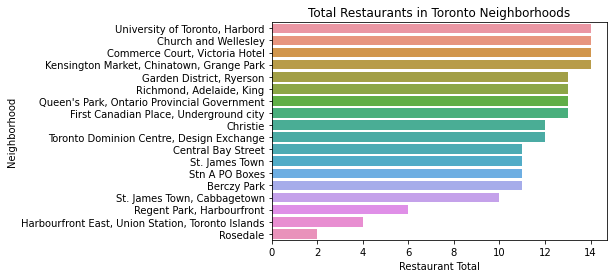

In [30]:
axT = sns.barplot(x="Restaurant Total", y="Neighborhood", data=T_grouped1).set_title('Total Restaurants in Toronto Neighborhoods')

Perform the same analysis on the Calgary datatset.

In [31]:
DataC4.head()

,Postal Code,Borough,Neighborhood,Latitude,Longitude
15,T1Y,Calgary,"Rundle, Whitehorn, Monterey Park",51.0759,-114.0015
17,T2A,Calgary,"Penbrooke Meadows, Marlborough",51.049680,-113.964320
18,T2B,Calgary,"Forest Lawn, Dover, Erin Woods",51.0318,-113.9786
19,T2C,Calgary,"Lynnwood Ridge, Ogden, Foothills Industrial, G...",50.9878,-114.0001
20,T2E,Calgary,"Bridgeland, Greenview, Zoo, YYC",51.0632,-114.0614


In [32]:
DataC5 = DataC4['Postal Code'].str.contains('T2')
DataC6 = DataC4[DataC5]
DataC6

,Postal Code,Borough,Neighborhood,Latitude,Longitude
17,T2A,Calgary,"Penbrooke Meadows, Marlborough",51.049680,-113.964320
18,T2B,Calgary,"Forest Lawn, Dover, Erin Woods",51.0318,-113.9786
19,T2C,Calgary,"Lynnwood Ridge, Ogden, Foothills Industrial, G...",50.9878,-114.0001
20,T2E,Calgary,"Bridgeland, Greenview, Zoo, YYC",51.0632,-114.0614
21,T2G,Calgary,"Inglewood, Burnsland, Chinatown, East Victoria...",51.0415,-114.0599
22,T2H,Calgary,"Highfield, Burns Industrial",50.9857,-114.0631
23,T2J,Calgary,"Queensland, Lake Bonavista, Willow Park, Acadia",50.9693,-114.0514
24,T2K,Calgary,"Thorncliffe, Tuxedo Park",51.0857,-114.0714
25,T2L,Calgary,"Brentwood, Collingwood, Nose Hill",51.0917,-114.1127
26,T2M,Calgary,"Mount Pleasant, Capitol Hill, Banff Trail",51.0696,-114.0862


In [33]:
C_Venues = getNearbyVenues(names=DataC6['Neighborhood'],
                                   latitudes=DataC6['Latitude'],
                                   longitudes=DataC6['Longitude']
                                  )

Penbrooke Meadows, Marlborough
Forest Lawn, Dover, Erin Woods
Lynnwood Ridge, Ogden, Foothills Industrial, Great Plains
Bridgeland, Greenview, Zoo, YYC
Inglewood, Burnsland, Chinatown, East Victoria Park, Saddledome
Highfield, Burns Industrial
Queensland, Lake Bonavista, Willow Park, Acadia
Thorncliffe, Tuxedo Park
Brentwood, Collingwood, Nose Hill
Mount Pleasant, Capitol Hill, Banff Trail
Kensington, Westmont, Parkdale, University
City Centre, Calgary Tower
Connaught, West Victoria Park
Elbow Park, Britannia, Parkhill, Mission
South Calgary (Altadore / Bankview / Richmond)
Oak Ridge, Haysboro, Kingsland, Kelvin Grove, Windsor Park
Braeside, Cedarbrae, Woodbine
Midnapore, Sundance
Millrise, Somerset, Bridlewood, Evergreen
Douglas Glen, McKenzie Lake, Copperfield, East Shepard


In [34]:
print(C_Venues.shape)
C_Venues.head()

(564, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,"Penbrooke Meadows, Marlborough",51.049680,-113.964320,Bob Bahan Aquatic & Fitness Centre,51.041609,-113.964319,Gym / Fitness Center
1,"Penbrooke Meadows, Marlborough",51.049680,-113.964320,TD Canada Trust,51.052399,-113.970643,Bank
2,"Penbrooke Meadows, Marlborough",51.049680,-113.964320,7-Eleven,51.045519,-113.957341,Convenience Store
3,"Penbrooke Meadows, Marlborough",51.049680,-113.964320,Shoppers Drug Mart,51.052750,-113.977420,Pharmacy
4,"Penbrooke Meadows, Marlborough",51.049680,-113.964320,7-Eleven,51.044357,-113.969612,Convenience Store


In [35]:
C_Venues1 = C_Venues['Venue Category'].str.contains('Restaurant')
C_Venues2 = C_Venues[C_Venues1]
C_Venues2

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
7,"Penbrooke Meadows, Marlborough",51.049680,-113.964320,Burger King,51.053909,-113.955502,Fast Food Restaurant
10,"Penbrooke Meadows, Marlborough",51.049680,-113.964320,Pho Rang Dong,51.044656,-113.969383,Vietnamese Restaurant
16,"Forest Lawn, Dover, Erin Woods",51.0318,-113.9786,Shawarma Palace,51.037969,-113.979086,Falafel Restaurant
18,"Forest Lawn, Dover, Erin Woods",51.0318,-113.9786,Pacific Hut Restaurant,51.036922,-113.988767,Asian Restaurant
20,"Forest Lawn, Dover, Erin Woods",51.0318,-113.9786,Indonesian Kitchen,51.037683,-113.977513,Indonesian Restaurant
...,...,...,...,...,...,...,...
540,"Millrise, Somerset, Bridlewood, Evergreen",50.9093,-114.0721,Tim Hortons,50.914432,-114.065943,Restaurant
543,"Millrise, Somerset, Bridlewood, Evergreen",50.9093,-114.0721,KFC,50.915200,-114.067000,Fast Food Restaurant
546,"Millrise, Somerset, Bridlewood, Evergreen",50.9093,-114.0721,McDonald's,50.912505,-114.064378,Fast Food Restaurant
549,"Millrise, Somerset, Bridlewood, Evergreen",50.9093,-114.0721,Hong Kong Garden,50.906493,-114.065873,Chinese Restaurant


In [36]:
C_Venues2.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
"Braeside, Cedarbrae, Woodbine",1,1,1,1,1,1
"Bridgeland, Greenview, Zoo, YYC",21,21,21,21,21,21
"City Centre, Calgary Tower",17,17,17,17,17,17
"Connaught, West Victoria Park",20,20,20,20,20,20
"Douglas Glen, McKenzie Lake, Copperfield, East Shepard",1,1,1,1,1,1
"Forest Lawn, Dover, Erin Woods",7,7,7,7,7,7
"Highfield, Burns Industrial",21,21,21,21,21,21
"Inglewood, Burnsland, Chinatown, East Victoria Park, Saddledome",15,15,15,15,15,15
"Kensington, Westmont, Parkdale, University",3,3,3,3,3,3


In [37]:
C_onehot = pd.get_dummies(C_Venues2[['Venue Category']], prefix="", prefix_sep="")

C_onehot['Neighborhood'] = C_Venues2['Neighborhood'] 

fixed_columns = [C_onehot.columns[-1]] + list(C_onehot.columns[:-1])
C_onehot = C_onehot[fixed_columns]

C_onehot.head()

,Neighborhood,American Restaurant,Asian Restaurant,Brazilian Restaurant,Chinese Restaurant,Dim Sum Restaurant,Falafel Restaurant,Fast Food Restaurant,Filipino Restaurant,French Restaurant,...,Moroccan Restaurant,New American Restaurant,Restaurant,Scandinavian Restaurant,Seafood Restaurant,Sushi Restaurant,Tapas Restaurant,Thai Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant
7,"Penbrooke Meadows, Marlborough",0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
10,"Penbrooke Meadows, Marlborough",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
16,"Forest Lawn, Dover, Erin Woods",0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
18,"Forest Lawn, Dover, Erin Woods",0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
20,"Forest Lawn, Dover, Erin Woods",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [38]:
C_onehot.shape

(166, 30)

In [39]:
C_grouped = C_onehot.groupby('Neighborhood').sum().reset_index()
C_grouped

,Neighborhood,American Restaurant,Asian Restaurant,Brazilian Restaurant,Chinese Restaurant,Dim Sum Restaurant,Falafel Restaurant,Fast Food Restaurant,Filipino Restaurant,French Restaurant,...,Moroccan Restaurant,New American Restaurant,Restaurant,Scandinavian Restaurant,Seafood Restaurant,Sushi Restaurant,Tapas Restaurant,Thai Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant
0,"Braeside, Cedarbrae, Woodbine",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,"Bridgeland, Greenview, Zoo, YYC",0,1,0,3,1,1,2,0,0,...,0,0,1,0,1,1,0,0,0,2
2,"City Centre, Calgary Tower",0,0,0,1,0,0,0,0,1,...,1,0,3,1,1,2,0,1,0,1
3,"Connaught, West Victoria Park",0,0,0,1,0,0,0,0,2,...,1,0,4,1,1,0,0,1,1,1
4,"Douglas Glen, McKenzie Lake, Copperfield, East...",0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,"Forest Lawn, Dover, Erin Woods",0,1,0,1,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,1
6,"Highfield, Burns Industrial",3,1,1,1,0,0,1,1,1,...,0,1,2,0,0,3,1,0,0,1
7,"Inglewood, Burnsland, Chinatown, East Victoria...",2,1,0,0,0,0,0,0,0,...,0,2,5,0,1,0,0,0,1,0
8,"Kensington, Westmont, Parkdale, University",0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
9,"Lynnwood Ridge, Ogden, Foothills Industrial, G...",0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [40]:
C_grouped.loc[:,'Restaurant Total'] = C_grouped.sum(numeric_only=True, axis=1)
C_grouped = C_grouped.sort_values('Restaurant Total', ascending=False)
C_grouped

,Neighborhood,American Restaurant,Asian Restaurant,Brazilian Restaurant,Chinese Restaurant,Dim Sum Restaurant,Falafel Restaurant,Fast Food Restaurant,Filipino Restaurant,French Restaurant,...,New American Restaurant,Restaurant,Scandinavian Restaurant,Seafood Restaurant,Sushi Restaurant,Tapas Restaurant,Thai Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Restaurant Total
6,"Highfield, Burns Industrial",3,1,1,1,0,0,1,1,1,...,1,2,0,0,3,1,0,0,1,21
1,"Bridgeland, Greenview, Zoo, YYC",0,1,0,3,1,1,2,0,0,...,0,1,0,1,1,0,0,0,2,21
3,"Connaught, West Victoria Park",0,0,0,1,0,0,0,0,2,...,0,4,1,1,0,0,1,1,1,20
13,"Oak Ridge, Haysboro, Kingsland, Kelvin Grove, ...",1,1,1,1,0,0,0,0,0,...,2,2,0,0,3,1,0,0,2,20
2,"City Centre, Calgary Tower",0,0,0,1,0,0,0,0,1,...,0,3,1,1,2,0,1,0,1,17
7,"Inglewood, Burnsland, Chinatown, East Victoria...",2,1,0,0,0,0,0,0,0,...,2,5,0,1,0,0,0,1,0,15
11,"Millrise, Somerset, Bridlewood, Evergreen",1,1,0,1,0,0,5,0,0,...,1,2,0,0,2,0,0,0,0,14
15,South Calgary (Altadore / Bankview / Richmond),0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,2,9
5,"Forest Lawn, Dover, Erin Woods",0,1,0,1,0,1,1,0,0,...,0,0,0,0,0,0,0,0,1,7
10,"Midnapore, Sundance",0,1,0,0,0,0,2,0,0,...,0,1,0,0,2,0,0,0,0,6


In [41]:
C_grouped1 = C_grouped[['Neighborhood','Restaurant Total']]
C_grouped1

,Neighborhood,Restaurant Total
6,"Highfield, Burns Industrial",21
1,"Bridgeland, Greenview, Zoo, YYC",21
3,"Connaught, West Victoria Park",20
13,"Oak Ridge, Haysboro, Kingsland, Kelvin Grove, ...",20
2,"City Centre, Calgary Tower",17
7,"Inglewood, Burnsland, Chinatown, East Victoria...",15
11,"Millrise, Somerset, Bridlewood, Evergreen",14
15,South Calgary (Altadore / Bankview / Richmond),9
5,"Forest Lawn, Dover, Erin Woods",7
10,"Midnapore, Sundance",6


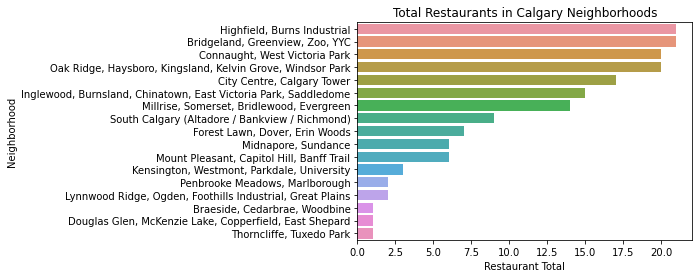

In [42]:
axC = sns.barplot(x="Restaurant Total", y="Neighborhood", data=C_grouped1).set_title('Total Restaurants in Calgary Neighborhoods')